In [35]:
%matplotlib notebook

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
#get school file
ride_file = "C:/Users/LENOVO USER/Desktop/USC Data Bootcamp/5-HW, Python Matplotlib, 6-16-18/Pyber/raw_data/ride_data.csv"

ride_file = pd.read_csv(ride_file)

sorted_ride_df = ride_file.sort_values('city',  ascending=True)

sorted_ride_df = sorted_ride_df.reset_index(drop=True)

#check
#sorted_ride_df.head()

In [38]:
#get school file
city_file = "C:/Users/LENOVO USER/Desktop/USC Data Bootcamp/5-HW, Python Matplotlib, 6-16-18/Pyber/raw_data/city_data.csv"

city_file = pd.read_csv(city_file)

sorted_city_df = city_file.sort_values('city',  ascending=True)

sorted_city_df = sorted_city_df.reset_index(drop=True)

#check
#sorted_city_df.head()

In [39]:
#calculate Average Fare ($) Per City
mean_fare_grouped = sorted_ride_df.groupby('city')['fare'].mean()
#mean_fare_grouped

#calculate total fare per city
total_fare_grouped = sorted_ride_df.groupby('city')['fare'].sum()

#calculate Total Number of Rides Per City
sum_rides_grouped = sorted_ride_df.groupby('city')['ride_id'].count()
#sum_rides_grouped

#create new data set for left join /merge
new_stats_city_ride_df = pd.DataFrame({'average_fare_per_city': mean_fare_grouped,'total_ride_per_city':sum_rides_grouped,
                                      'total_fare_per_city': total_fare_grouped})

new_stats_city_ride_df = new_stats_city_ride_df.reset_index()

#check
#new_stats_city_ride_df.head()

In [40]:
#create a combine data set from sorted_city_df and new_stats_city_ride_df

merge_city_ride_df = sorted_city_df.merge(new_stats_city_ride_df,on='city')

#merge_city_ride_df.head()

# Bubble Plot of Ride Sharing Data:

In [41]:
#create 3 data sets based city type: rural, urban and suburban

city_rural_df = merge_city_ride_df[merge_city_ride_df['type'] == 'Rural']

city_suburban_df = merge_city_ride_df[merge_city_ride_df['type'] == 'Suburban']

city_urban_df = merge_city_ride_df[merge_city_ride_df['type'] == 'Urban']

#city_rural_df.head()
#city_suburban_df
#city_urban_df

In [42]:
#create x axis for each city type

x_axis_rural = city_rural_df['total_ride_per_city']  
x_axis_sub = city_suburban_df['total_ride_per_city']
x_axis_urban = city_urban_df['total_ride_per_city']

#x_axis_rural
#x_axis_sub
#x_axis_urban


In [43]:
#create y axis for average fares by city type, 1-Rural, 2-Suburban and 3-Urban

y_fares_axis_rural = city_rural_df['average_fare_per_city']
y_fares_axis_sub = city_suburban_df['average_fare_per_city']
y_fares_axis_urban = city_urban_df['average_fare_per_city']


#y_fares_axis_rural
#y_fares_axis_sub
#y_fares_axis_urban


In [44]:
#create y axis for total driver by city type, 1-Rural, 2-Suburban and 3-Urban


total_driver_per_city_rural = city_rural_df['driver_count']

total_driver_per_city_sub = city_suburban_df['driver_count']

total_driver_per_city_urban = city_urban_df['driver_count']


#total_driver_per_city_rural
#total_driver_per_city_sub
#total_driver_per_city_urban

In [45]:
#check for lenght
#len(x_axis_rural)

In [46]:
#check for lenght
#len(y_fares_axis_rural)

In [47]:
#check for lenght
#len(total_driver_per_city_rural)

<IPython.core.display.Javascript object>


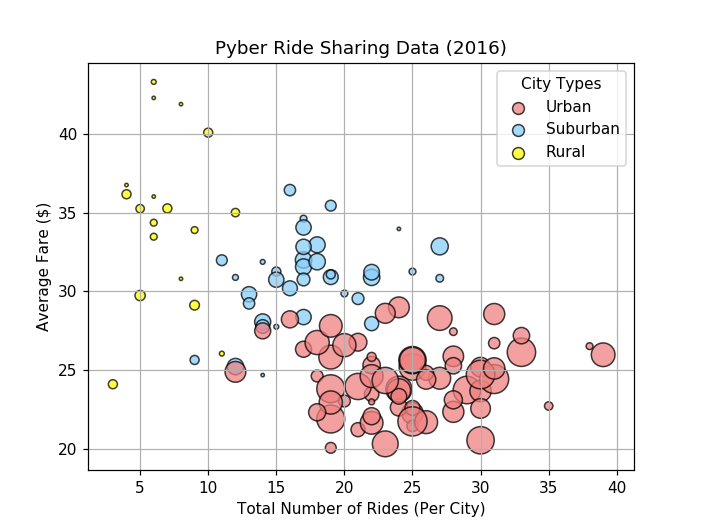

In [51]:
#plt.figure(1)

#plot rural data
rural_plot = plt.scatter(x_axis_rural, y_fares_axis_rural, marker="o", facecolors="yellow", edgecolors="black",
                         s=5*total_driver_per_city_rural, alpha=0.75,label="Rural")

#plot suburban data
suburban_plot = plt.scatter(x_axis_sub, y_fares_axis_sub, marker="o", facecolors="lightskyblue", edgecolors="black",
                            s=5*total_driver_per_city_sub, alpha=0.75,label="Suburban")

#plot urban data
urban_plot = plt.scatter(x_axis_urban, y_fares_axis_urban, marker="o", facecolors="lightcoral", edgecolors="black",
                         s=5*total_driver_per_city_urban, alpha=0.75,label="Urban")

#plt.xlim(0, 40)
#plt.ylim(,)

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

lgnd = plt.legend(handles=[urban_plot,suburban_plot,rural_plot], title="City Types", loc="best")
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]

plt.grid()
plt.savefig("C:/Users/LENOVO USER/Desktop/USC Data Bootcamp/5-HW, Python Matplotlib, 6-16-18/Pyber/Pyber_Ride_Sharing Data.png")


# Total Fares by City Type:

In [54]:
#calculate total fares, total ride and total driver per city type via groupby

total_fare_per_c_type = merge_city_ride_df.groupby('type')['total_fare_per_city'].sum()
total_ride_per_c_type = merge_city_ride_df.groupby('type')['total_ride_per_city'].sum()
total_driver_per_c_type = merge_city_ride_df.groupby('type')['driver_count'].sum()

#create new data frame per city type
statistics_per_city_type_df = pd.DataFrame({'total_fare_per_city_type': total_fare_per_c_type,
                                            'total_rides_per_city_type': total_ride_per_c_type,
                                            'total_driver_per_city_type':total_driver_per_c_type})

#reset index
statistics_per_city_type_df = statistics_per_city_type_df.reset_index()

#statistics_per_city_type_df.head()

In [55]:
#get total fares per city type from statistics_per_city_type_df data set
fares_per_city_type = [s for s in statistics_per_city_type_df['total_fare_per_city_type']]
#fares_per_city_type

In [56]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban'", "Urban'"]

# The values of each section of the pie chart
sizes_fares = fares_per_city_type

# The colors of each section of the pie chart
colors = ["yellow", "lightskyblue", "lightcoral"]

#seperate the section from the others
explode = (0, 0, 0.1)

<IPython.core.display.Javascript object>


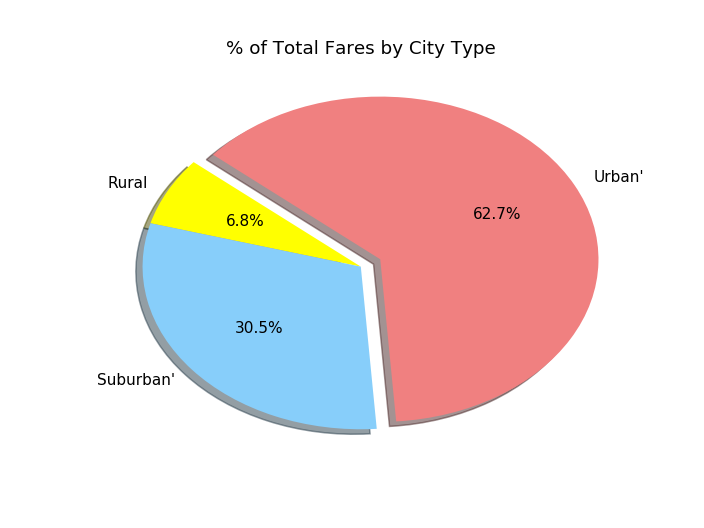

In [57]:
plt.figure(2)
plt.pie(sizes_fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.savefig("C:/Users/LENOVO USER/Desktop/USC Data Bootcamp/5-HW, Python Matplotlib, 6-16-18/Pyber/Total_Fares_by_City_Type.png")

# Total Rides by City Type:

In [58]:
#get total rides per city type from statistics_per_city_type_df data set
rides_per_city_type = [s for s in statistics_per_city_type_df['total_rides_per_city_type']]
#rides_per_city_type

In [59]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban'", "Urban'"]

# The values of each section of the pie chart
sizes_rides = rides_per_city_type

# The colors of each section of the pie chart
colors = ["yellow", "lightskyblue", "lightcoral"]

#seperate the section from the others
explode = (0, 0, 0.1)

<IPython.core.display.Javascript object>


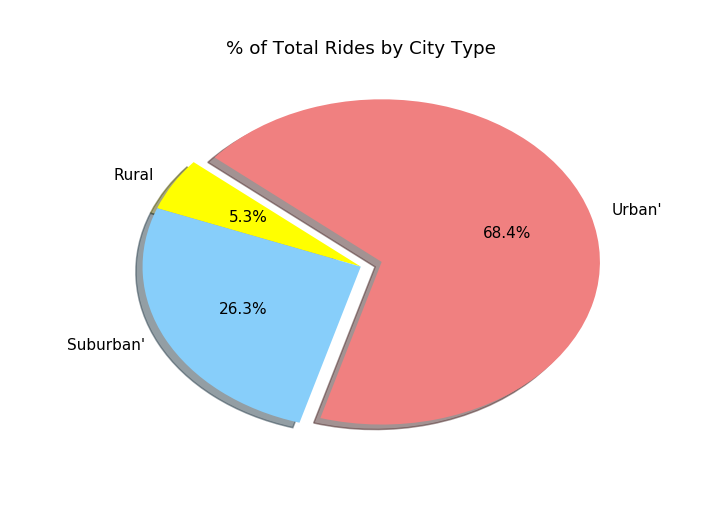

In [60]:
plt.figure(3)
plt.pie(sizes_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.savefig("C:/Users/LENOVO USER/Desktop/USC Data Bootcamp/5-HW, Python Matplotlib, 6-16-18/Pyber/Total_Rides_by_City_Type.png")

# Total Drivers by City Type:

In [61]:
#get total driver per city type from statistics_per_city_type_df data set
drivers_per_city_type = [s for s in statistics_per_city_type_df['total_driver_per_city_type']]
drivers_per_city_type

[78, 490, 2405]

In [62]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban'", "Urban'"]

# The values of each section of the pie chart
sizes_drivers = drivers_per_city_type

# The colors of each section of the pie chart
colors = ["yellow", "lightskyblue", "lightcoral"]

#seperate the section from the others
explode = (0, 0, 0.1)

<IPython.core.display.Javascript object>


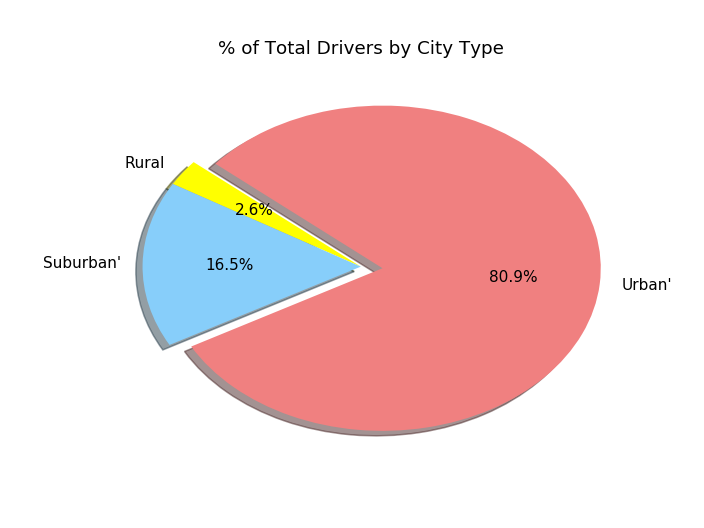

In [63]:
plt.figure(4)
plt.pie(sizes_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.savefig("C:/Users/LENOVO USER/Desktop/USC Data Bootcamp/5-HW, Python Matplotlib, 6-16-18/Pyber/Total_Drivers_by_City_Type.png")